### 📂 Session Setup – Qualifying 2024 vs 2025

This notebook loads and prepares qualifying session data from both 2024 and 2025 at Barcelona.  
It enables side-by-side comparisons of driver performance across seasons using FastF1’s telemetry and lap data tools.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import fastf1.plotting
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
from fastf1 import utils
import matplotlib.pyplot as plt
from fastf1.utils import delta_time
import matplotlib.colors as mcolors
import warnings


In [2]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session1 = fastf1.get_session(2025, 'Hungary Grand Prix', 'FP2')
session1.load()
# In this way i Can exclude the box laps
laps1 = session1.laps.pick_wo_box()

# Pick just the accurate laps
laps1 = laps1[laps1['IsAccurate']==True]

circuit_info = session1.get_circuit_info()




/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
req         WARNING 	DEFAULT CACHE ENABLED! (8.14 GB) /Users/PietroPaolo/Library/Caches/fastf1
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            

In [3]:
# enable some matplotlib patches for plotting timedelta values and load
# FastF1's default color scheme
fastf1.plotting.setup_mpl(misc_mpl_mods=False, color_scheme='fastf1' )


# load a session and its telemetry data
session2 = fastf1.get_session(2025, 'Hungary Grand Prix', 'R')
session2.load()
# In this way i Can exclude the box laps
laps2 = session2.laps.pick_wo_box()

# Pick just the accurate laps
laps2 = laps2[laps2['IsAccurate']==True]

circuit_info = session2.get_circuit_info()




/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req    

In [4]:
drivers1=laps1['Driver'].unique()
compounds1 = laps1['Compound'].unique()

drivers2 =laps2['Driver'].unique()
compounds2 = laps2['Compound'].unique()


In [5]:
def timedelta_to_seconds(td: pd.Timedelta) -> float:
    """
    Convert a pandas Timedelta to a float representing the total seconds.
    
    Parameters:
    - td: pd.Timedelta
    
    Returns:
    - float: total seconds
    """
    return td.total_seconds()

### ⏱️ Lap Time Transformation and Team Sorting

Lap times are converted into seconds for accurate statistical analysis.  
Teams are then ranked by median lap time to evaluate relative performance gains or losses between the two years.

In [6]:
# Transform the laps in total seconds
transformed_laps1 = laps1.copy()
transformed_laps1.loc[:, "LapTime (s)"] = laps1["LapTime"].dt.total_seconds()

transformed_laps2 = laps2.copy()
transformed_laps2.loc[:, "LapTime (s)"] = laps2["LapTime"].dt.total_seconds()


# order the team from the fastest (lowest median lap time) to slower
team_order1 = (
    transformed_laps1[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# order the team from the fastest (lowest median lap time) to slower
team_order2 = (
    transformed_laps2[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# Manually assign official or visually appropriate colors to each team
TEAM_COLORS = {
    'McLaren': '#FF8700',         # Papaya
    'Ferrari': '#DC0000',         # Classic red
    'Red Bull Racing': '#1E41FF', # Deep blue
    'Mercedes': '#00D2BE',        # Teal
    'Williams': '#005AFF',        # Royal blue
    'Racing Bulls': '#6692FF',    # Light blue
    'Kick Sauber': '#90EE90',     # Light green
    'Alpine': '#FE86BC',          # Pinkish magenta
    'Haas F1 Team': '#B6BABD',    # Silver/gray
    'Aston Martin': '#006F62',    # Racing green
}

# Assign team colors safely
def get_team_color(team):
    team = team.strip()
    return TEAM_COLORS.get(team, '#000000')  # fallback to black

# Create the palette
team_palette = {team: get_team_color(team) for team in team_order1}


In [7]:
colors = {
    # Red Bull Racing
    "VER": "blue",  # Max Verstappen
    "TSU": "blue",  # Liam Lawson

    # McLaren
    "NOR": "orange",  # Lando Norris
    "PIA": "orange",  # Oscar Piastri

    # Ferrari
    "LEC": "red",    # Charles Leclerc§
    "HAM": "red",    # Lewis Hamilton

    # Mercedes
    "RUS": "grey",   # George Russell
    "ANT": "grey",   # Andrea Kimi Antonelli

    # Aston Martin
    "ALO": "green",  # Fernando Alonso
    "STR": "green",  # Lance Stroll

    # Alpine
    "GAS": "pink",   # Pierre Gasly
    "DOO": "pink",   # Jack Doohan

    # Haas
    "OCO": "olive",  # Esteban Ocon
    "BEA": "olive",  # Oliver Bearman

    # Racing Bulls (formerly AlphaTauri)
    "HAD": "#9932CC",  # Isack Hadjar
    "LAW": "#9932CC",  # Yuki Tsunoda

    # Williams
    "ALB": "navy",   # Alexander Albon
    "SAI": "navy",   # Carlos Sainz Jr.

    # Sauber (transitioning to Audi)
    "HUL": "lime",   # Nico Hülkenberg
    "BOR": "lime",   # Gabriel Bortoleto
}

In [8]:
from scipy.interpolate import PchipInterpolator

def interpolate_dataframe(df):
    target_points=5000
    new_df = pd.DataFrame()
    n = len(df)

    original_index = np.linspace(0, 1, n)
    new_index = np.linspace(0, 1, target_points)

    for column in df.columns:
        original_data = df[column].to_numpy()
        dtype = original_data.dtype

        # Handle continuous numerical values
        if np.issubdtype(dtype, np.floating):
            interpolator = PchipInterpolator(original_index, original_data)
            new_data = interpolator(new_index)

        # Handle datetime64
        elif np.issubdtype(dtype, np.datetime64):
            time_int = original_data.astype('datetime64[ns]').astype('int64')
            interpolator = PchipInterpolator(original_index, time_int)
            new_data = pd.to_datetime(interpolator(new_index))

        # Handle timedelta64
        elif np.issubdtype(dtype, np.timedelta64):
            time_int = original_data.astype('timedelta64[ns]').astype('int64')
            interpolator = PchipInterpolator(original_index, time_int)
            new_data = pd.to_timedelta(interpolator(new_index))

        # Handle integer-like data (e.g., gears) – round PCHIP
        elif np.issubdtype(dtype, np.integer):
            interpolator = PchipInterpolator(original_index, original_data)
            new_data = np.round(interpolator(new_index)).astype(original_data.dtype)

        # Handle booleans – use nearest (forward-fill style)
        elif np.issubdtype(dtype, np.bool_):
            nearest_indices = np.clip(np.round(new_index * (n - 1)).astype(int), 0, n - 1)
            new_data = original_data[nearest_indices]

        # Handle strings/objects – use nearest
        else:
            nearest_indices = np.clip(np.round(new_index * (n - 1)).astype(int), 0, n - 1)
            new_data = original_data[nearest_indices]

        new_df[column] = new_data

    return new_df

In [9]:
import os
os.chdir('/Users/PietroPaolo/Desktop/GitHub/F1/')
print("Current directory:", os.getcwd())  # Should now print `/Users/PietroPaolo/Desktop/GitHub/F1/`

Current directory: /Users/PietroPaolo/Desktop/GitHub/F1


In [10]:
import sys
import import_ipynb

# Add the parent directory to the Python module search path
sys.path.append('/Users/PietroPaolo/Desktop/GitHub/F1/')

# Import the RacePaceAnalyzer class from the notebook
from model_prediction_race_pace import RacePaceAnalyzer

/Users/PietroPaolo/opt/anaconda3/envs/progLab/lib/python3.9/site-packages/fastf1/plotting/_plotting.py:57: FutureWarning: The `misc_mpl_mods` argument was dropped from `.setup_mpl()` in version 3.6.0 and has no effect anymore. It will be removed in a future version of FastF1.
  warnings.warn(
core           INFO 	Loading data for Bahrain Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_

Transformed laps for Bahrain Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Saudi Arabian Grand Prix FP2 loaded successfully.


core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Japanese Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core  

Transformed laps for Australian Grand Prix FP2 loaded successfully.


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 63)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Emilia Romagna Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req 

Transformed laps for Japanese Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Canadian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Emilia Romagna Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Spanish Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Canadian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for British Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Spanish Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Hungarian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for British Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Hungarian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Dutch Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Belgian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Italian Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Dutch Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Singapore Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Italian Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '43', '44', '55', '63', '77', '81']
events      WARNING 	Correcting user input 'Mexican Grand Prix' to 'Mexico City Grand Prix'
core           INFO 	Loading data for Mexico City Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        

Transformed laps for Singapore Grand Prix FP2 loaded successfully.


core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Mexican Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '31', '43', '44', '55', '63', '77', '81']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Practice 2 [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


Transformed laps for Las Vegas Grand Prix FP2 loaded successfully.


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '30', '43', '44', '55', '61', '63', '77', '81']


Transformed laps for Abu Dhabi Grand Prix FP2 loaded successfully.
Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        23
           1       0.97      0.89      0.93        37

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60

Pipeline saved to race_pace_pipeline.pkl


In [11]:
# Example: Analyze event data
# Initialize the analyzer
# Example: Analyze event data
# Initialize the analyzer
analyzer = RacePaceAnalyzer()

# Load the pipeline
analyzer.load_model(path='race_pace_pipeline.pkl')

race_pace_laps_fp2 = analyzer.get_race_pace_laps(transformed_laps1)


Pipeline loaded successfully


In [18]:
leclerc_stint1_race = transformed_laps2[(transformed_laps2["Driver"] == "LEC") & (transformed_laps2["Stint"] == 1.0)]

leclerc_stint_fp2 = race_pace_laps_fp2[(race_pace_laps_fp2["Driver"] == "LEC")]

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

class LeclercStintStyledPlot:
    def __init__(self, race_stint_df, fp2_df):
        self.race_stint_df = race_stint_df.copy().reset_index(drop=True)
        self.fp2_df = fp2_df.copy().reset_index(drop=True)

        # Start from Lap 1
        self.race_stint_df['LapNumber'] = range(1, len(self.race_stint_df) + 1)
        self.fp2_df['LapNumber'] = range(1, len(self.fp2_df) + 1)

    def plot(self, title="Leclerc - Race Stint 1 vs FP2 Pace"):
        plt.style.use('dark_background')
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_facecolor('#0f111a'); fig.patch.set_facecolor('#0f111a')
        ax.grid(True, linestyle='--', alpha=0.4)

        # Plot lines
        ax.plot(
            self.race_stint_df['LapNumber'],
            self.race_stint_df['LapTime (s)'],
            color='red',
            linewidth=2.5,
            alpha=0.85,
            solid_capstyle='round'
        )
        ax.plot(
            self.fp2_df['LapNumber'],
            self.fp2_df['LapTime (s)'],
            color='white',
            linewidth=2.5,
            alpha=0.85,
            solid_capstyle='round'
        )

        # Y-axis formatting
        def format_time(x, pos):
            minutes = int(x // 60)
            seconds = x % 60
            return f"{minutes}:{seconds:04.1f}"
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_time))

        # Axis + title styling
        ax.set_xlabel("Lap", color='white', fontsize=14)
        ax.set_ylabel("Lap Time", color='white', fontsize=14)
        ax.set_title(title, color='white', fontsize=20)
        ax.tick_params(colors='white')
        for spine in ax.spines.values():
            spine.set_edgecolor('#44475a')

        # Inline end-of-line labels instead of legend
        race_last = self.race_stint_df.iloc[-1]
        fp2_last = self.fp2_df.iloc[-1]

        ax.text(
            race_last['LapNumber'] + 0.5,
            race_last['LapTime (s)'],
            "Race Stint 1",
            color='red',
            fontsize=11,
            fontweight='bold',
            va='center'
        )
        ax.text(
            fp2_last['LapNumber'] + 0.5,
            fp2_last['LapTime (s)'],
            "FP2 Pace",
            color='white',
            fontsize=11,
            fontweight='bold',
            va='center'
        )

        # Signature
        fig.text(0.9, 0.88, "Provided by:\nPietro Paolo Melella",
                 ha='right', va='bottom', color='white', fontsize=13)

        plt.tight_layout()
        plt.show()

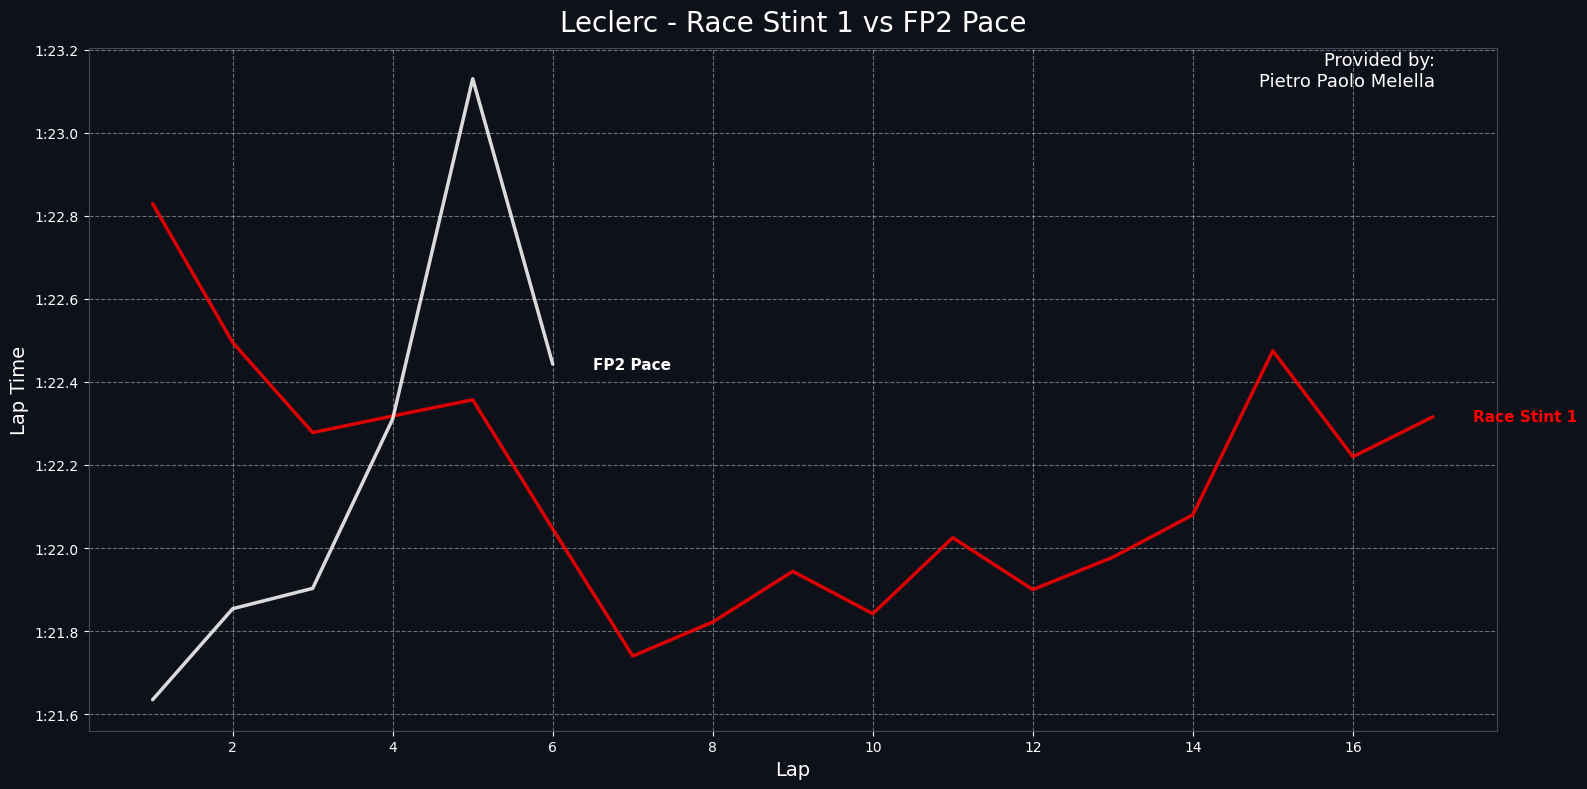

In [14]:
plotter = LeclercStintStyledPlot(leclerc_stint1_race, leclerc_stint_fp2)
plotter.plot()